In [1]:
import numpy as np 
from matplotlib import pyplot as plt
# Données binaires :
Class0 = np.array([[1, 9], [5, 5], [1, 1]])
Class1 = np.array([[8, 5], [13, 1], [13, 9]])


In [9]:
# Nombre d'échantillons (lignes) dans le jeu de données :
n0 = len(Class0) # 3
n1 = len(Class1) # 3
n = n0 + n1 # 6
n

6

In [4]:
Class0

array([[1, 9],
       [5, 5],
       [1, 1]])

In [10]:
# Concaténer les deux matrices (class0 et class1) et fournir le vecteur d'étiquettes :
X = np.concatenate((Class0, Class1), axis=0) # matrice des caractéristiques
y = np.array([0] * n0 + [1] * n1) # vecteur des étiquettes
X

array([[ 1,  9],
       [ 5,  5],
       [ 1,  1],
       [ 8,  5],
       [13,  1],
       [13,  9]])

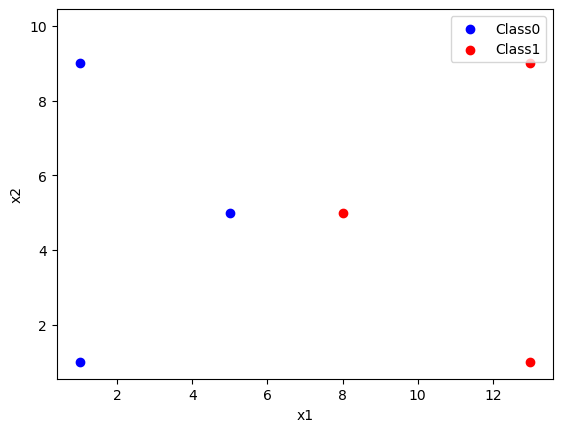

In [35]:
# Tracer les points dans un nuage de points :
plt.scatter(Class0[:, 0], Class0[:, 1], color='blue', label='Class0')
plt.scatter(Class1[:, 0], Class1[:, 1], color='red', label='Class1')
plt.plot(10, 10, color='black', linestyle='--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [36]:

# Tracer les vecteurs de support et le plan de décision pour une SVM linéaire avec une marge maximale pour ce jeu de données :
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1e5) # C grand pour éviter la régularisation
svm.fit(X, y)

# Obtenir les coefficients du modèle :
w = svm.coef_[0] # vecteur normal au plan
b = svm.intercept_[0] # biais
print('w =', w)
print('b =', b)

# Définir la fonction du plan de décision :
def decision_function(x):
    return (-w[0] * x - b) / w[1]

w = [ 6.66666667e-01 -5.55111512e-17]
b = -4.33333333333333


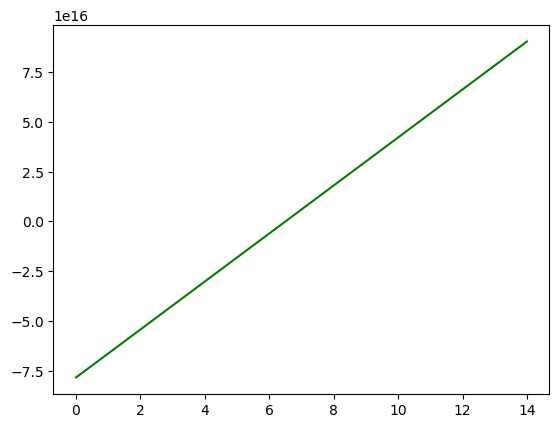

In [37]:


# Tracer le plan de décision :
x1 = np.linspace(0, 14, 100) # valeurs de x1
x2 = decision_function(x1) # valeurs de x2
plt.plot(x1, x2, color='green', label='Decision boundary')

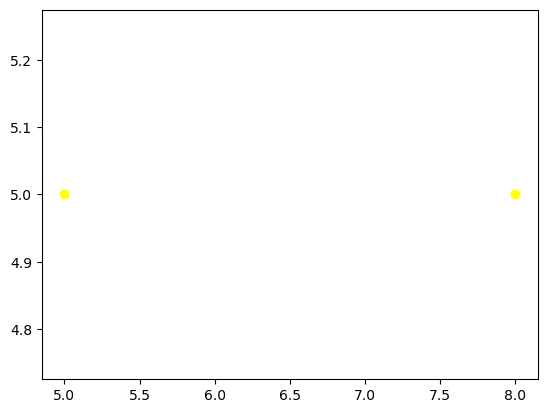

In [38]:
# Tracer les vecteurs de support :
support_vectors = svm.support_vectors_ # vecteurs de support
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', label='Support vectors')

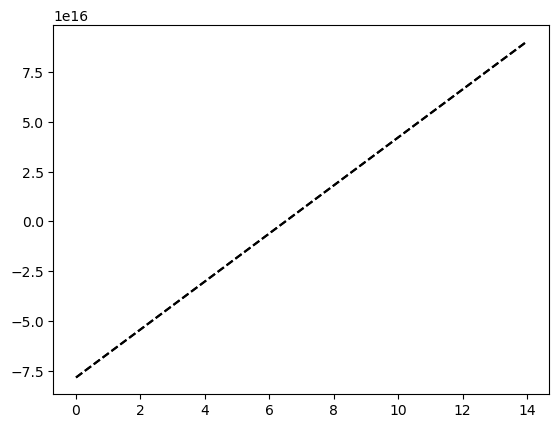

In [39]:
# Tracer les marges :
margin = 1 / np.linalg.norm(w) # largeur de la marge
x2_pos = decision_function(x1) + margin # bord supérieur de la marge
x2_neg = decision_function(x1) - margin # bord inférieur de la marge
plt.plot(x1, x2_pos, color='black', linestyle='--', label='Margin')
plt.plot(x1, x2_neg, color='black', linestyle='--')

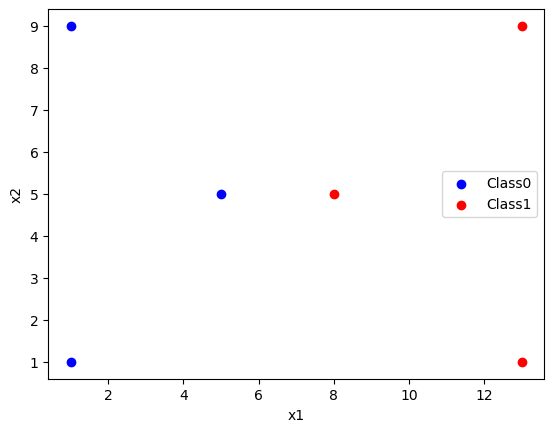

In [40]:
# Tracer les points :
plt.scatter(Class0[:, 0], Class0[:, 1], color='blue', label='Class0')
plt.scatter(Class1[:, 0], Class1[:, 1], color='red', label='Class1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()